# Astronomy AI Tutor: RAG-Based Chatbot for Course Materials

*Project 1 - Jacob Parzych & Niko Jamison*

## Problem Motivation

### 🎯 **The Universal Learning Challenge**

As students, we've all experienced the frustration of having questions about course material but being unable to get immediate help. Whether it's late at night while studying, during busy office hours, or simply wanting to review concepts at your own pace, traditional learning support has limitations.

### 💡 **Our Solution: A Versatile AI Tutor**

We wanted to create a project that would be **practical beyond just this class** - something that could benefit students in any course. Our RAG-based AI tutor is designed to work with **any subject matter** as long as you provide the appropriate lecture files. Simply drop in markdown files from any course, and the system creates a personalized tutor for that content.

### 🌟 **Real-World Benefits**

**For Students:**
- **24/7 Availability**: Get help anytime, anywhere - no waiting for office hours
- **Personalized Learning**: Ask questions in your own words and get targeted explanations
- **Self-Paced Study**: Review material without feeling rushed or judged
- **Immediate Feedback**: Instant responses to clarify concepts during study sessions

**For Educators:**
- **Scalable Support**: Help more students without increasing workload  
- **Consistent Answers**: Ensure all students get accurate, course-aligned responses
- **Learning Analytics**: Understand common student questions and knowledge gaps
- **Accessibility**: Support students who may be hesitant to ask questions in person

**Universal Application:**
- **Any Subject**: Works with physics, biology, computer science, literature, history - you name it
- **Any Level**: From introductory courses to advanced graduate seminars
- **Any Format**: Processes markdown lecture notes, making it easy for instructors to adopt


## Project Overview

This project implements a Retrieval-Augmented Generation (RAG) system that serves as an AI tutor for astronomy course materials. The system processes lecture notes from the course, creates a searchable knowledge base using sentence transformers, and provides intelligent responses to student questions by combining relevant course content with AI-generated explanations.

### Key Features:
- **Document Processing**: Automatically loads and chunks all lecture markdown files
- **Semantic Search**: Uses sentence transformers to find relevant content
- **AI Integration**: Leverages OpenAI's API for intelligent responses
- **Interactive Chat**: Simple command-line interface for student queries
- **Object-Oriented Design**: Clean, modular architecture with multiple classes

### Technical Implementation:
The system uses three main classes:
1. **DocumentProcessor**: Handles loading and chunking of lecture files
2. **VectorStore**: Manages embeddings and similarity search
3. **AITutor**: Orchestrates the complete RAG pipeline

This demonstrates proficiency in Python programming concepts including OOP, file I/O, error handling, and integration with modern AI tools.

## Installation and Setup Guide

Before running this project, you'll need to install several Python packages. This notebook uses modern machine learning and natural language processing libraries to create the RAG system.

### Required Libraries Overview:

- **sentence-transformers**: For creating semantic embeddings of text
- **anthropic**: For interacting with Claude AI (can be replaced with OpenAI)
- **numpy**: For numerical computations and array operations
- **matplotlib**: For data visualization and plotting
- **python-dotenv**: For secure environment variable management

### Installation Process:
The following cell will install all required packages using pip. The `%pip` magic command ensures packages are installed in the current notebook environment.

In [1]:
# Install required packages
%pip install sentence-transformers anthropic numpy matplotlib python-dotenv

Note: you may need to restart the kernel to use updated packages.


### 📦 Package Installation Complete!

The above cell installed all necessary dependencies. Here's what each package does:

1. **sentence-transformers** (🧠 AI Models): Pre-trained models for converting text into numerical vectors
2. **anthropic** (🤖 AI API): SDK for Claude AI - provides intelligent conversation capabilities
3. **numpy** (🔢 Math): Fundamental package for scientific computing with arrays
4. **matplotlib** (📊 Visualization): Plotting library for creating charts and graphs
5. **python-dotenv** (🔐 Security): Safely loads API keys from environment files

**Note**: If you see any warnings during installation, they can typically be ignored unless they indicate missing dependencies.

## Library Import and Configuration

Now we'll import all the necessary libraries and configure our environment. This section sets up the foundation for our RAG system.

### Import Categories:

**🗂️ System and File Operations:**
- `os`: Operating system interface for file paths and environment variables
- `glob`: File pattern matching for finding lecture files
- `datetime`: Date and time handling for timestamps

**🔢 Data Processing:**
- `numpy`: Numerical computing for vector operations
- `matplotlib.pyplot`: Plotting and visualization tools

**🧠 Machine Learning and AI:**
- `sentence_transformers.SentenceTransformer`: Pre-trained models for text embeddings
- `anthropic`: Claude AI SDK for natural language generation

**📋 Type Hints and Utilities:**
- `typing.List, Dict`: Type annotations for better code documentation
- `collections.Counter`: Efficient counting utilities
- `warnings`: Control warning messages

**🔐 Security:**
- `dotenv.load_dotenv`: Secure API key management

In [2]:
# Import necessary libraries
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import anthropic
from typing import List, Dict
from datetime import datetime
from collections import Counter
from dotenv import load_dotenv
import warnings

warnings.filterwarnings('ignore')
load_dotenv()

# Load environment variables from .env file

True

### ✅ Import and Configuration Complete!

**What just happened:**
1. **Imports Loaded**: All necessary libraries are now available in the notebook environment
2. **Warnings Filtered**: Non-critical warnings are suppressed for cleaner output
3. **Environment Variables**: The `.env` file is loaded to access API keys securely

### 🔧 Environment Setup Requirements:

To run this project successfully, you'll need to create a `.env` file in your project directory with your API key:

```
ANTHROPIC_API_KEY=your_api_key_here
```

**Alternative AI Providers:**
If you prefer to use OpenAI instead of Anthropic, you can:
1. Replace `anthropic` with `openai` in the installation
2. Update the import to `import openai`
3. Set `OPENAI_API_KEY` in your `.env` file

**🚀 Ready to Proceed:**
With all libraries imported and configured, we're ready to build our RAG system classes!

## Class 1: Document Processor

The `DocumentProcessor` class handles loading and processing of lecture markdown files. It's the first step in our RAG pipeline that converts raw text files into searchable chunks.

### 🎯 **What it does:**
- **Loads all `.md` files** from the Lecture directory
- **Splits text by sections** (using `##` headers as natural breakpoints)
- **Creates structured chunks** with metadata for tracking

### 🧠 **Why this approach:**
- **Section-based chunking** keeps related concepts together (better than random splitting)
- **Metadata tracking** lets us show which lecture an answer came from
- **Error handling** keeps the system running even if some files have issues

### 🔧 **Key methods:**
- `load_and_process_documents()` - Does the main work of finding and processing files
- `chunk_by_sections()` - Splits text intelligently at section boundaries  
- `get_chunks()` - Returns the processed chunks for the next step

In [3]:
class DocumentProcessor:
    """
    A simplified class to process lecture documents for RAG implementation.
    """
    
    def __init__(self, lecture_directory: str):
        """Initialize the DocumentProcessor."""
        self.lecture_directory = lecture_directory
        self.chunks = []
        
    def load_and_process_documents(self) -> None:
        """Load all markdown files and process them into chunks."""
        try:
            # Find all markdown files
            pattern = os.path.join(self.lecture_directory, "*.md")
            markdown_files = glob.glob(pattern)
            
            if not markdown_files:
                raise FileNotFoundError(f"No markdown files found in {self.lecture_directory}")
            
            print(f"Found {len(markdown_files)} lecture files")
            
            total_chunks = 0
            for file_path in markdown_files:
                with open(file_path, 'r', encoding='utf-8') as f:
                    content = f.read()
                    
                filename = os.path.basename(file_path).replace('.md', '')
                doc_chunks = self.chunk_by_sections(content, filename)
                self.chunks.extend(doc_chunks)
                total_chunks += len(doc_chunks)
                print(f"  - {filename}: {len(doc_chunks)} chunks")
            
            print(f"Total chunks created: {total_chunks}")
                    
        except Exception as e:
            print(f"Error processing documents: {e}")
            raise
    
    def chunk_by_sections(self, text: str, source_filename: str) -> List[Dict]:
        """Split document into chunks based on ## section headers."""
        sections = text.split('\n## ')
        chunks = []
        
        for i, section in enumerate(sections):
            # Add back the '## ' that was removed during split
            if i == 0:
                chunk_text = section
            else:
                chunk_text = '## ' + section
            
            # Only keep chunks with substantial content
            if len(chunk_text.strip()) > 100:
                chunks.append({
                    'text': chunk_text.strip(),
                    'source_file': source_filename,
                    'chunk_id': i
                })
        
        return chunks
    
    def get_chunks(self) -> List[Dict]:
        """Return the processed chunks."""
        return self.chunks

## Class 2: Vector Store

The `VectorStore` class manages the embedding and retrieval system. It converts text chunks into numbers that capture their meaning, then finds the most relevant ones for any question.

### 🎯 **What it does:**
- **Converts text to vectors** using a pre-trained AI model (sentence transformers)
- **Stores embeddings efficiently** in memory for fast searching
- **Finds relevant chunks** by comparing vector similarities (not just keyword matching)

### 🧠 **Why this approach:**
- **Semantic understanding** - finds relevant content even when exact words don't match
- **Smart similarity** - "What is a variable?" matches content about "storing data"
- **Fast retrieval** - mathematical operations are much faster than text searching

### 🔧 **Key methods:**
- `__init__()` - Loads the sentence transformer model (takes ~30 seconds first time)
- `add_chunks()` - Converts all text chunks into searchable vectors
- `search()` - Finds the most relevant chunks for a given question

In [4]:
class VectorStore:
    """
    A simplified class to manage embeddings and similarity search.
    """
    
    def __init__(self):
        """Initialize the VectorStore."""
        print("Loading sentence transformer model...")
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.chunks = []
        self.embeddings = None
        
    def add_chunks(self, chunks: List[Dict]) -> None:
        """Add chunks and create embeddings."""
        print(f"Creating embeddings for {len(chunks)} chunks...")
        
        self.chunks = chunks
        chunk_texts = [chunk['text'] for chunk in chunks]
        
        self.embeddings = self.model.encode(chunk_texts, convert_to_tensor=True)
        print(f"Created embeddings with dimension: {self.embeddings.shape[1]}")
    
    def search(self, query: str, top_k: int = 3) -> List[Dict]:
        """Search for relevant chunks based on similarity."""
        if self.embeddings is None:
            return []
        
        # Get query embedding
        query_embedding = self.model.encode([query], convert_to_tensor=True)
        
        # Calculate similarities (using built-in utility function)
        from sentence_transformers.util import cos_sim
        similarities = cos_sim(query_embedding, self.embeddings)[0]
        
        # Get top results
        top_indices = similarities.argsort(descending=True)[:top_k]
        
        results = []
        for idx in top_indices:
            if similarities[idx] > 0.1:  # minimum similarity threshold
                result = self.chunks[idx].copy()
                result['similarity_score'] = float(similarities[idx])
                results.append(result)
        
        return results

## Class 3: AI Tutor

The `AITutor` class brings everything together. It coordinates the document processing, vector search, and AI generation to create a complete question-answering system.

### 🎯 **What it does:**
- **Orchestrates the RAG pipeline** - combines retrieval + AI generation
- **Manages API connections** securely using environment variables
- **Provides simple interface** - just call `ask(question)` and get an answer

### 🧠 **Why this approach:**
- **RAG methodology** - finds relevant info first, then generates accurate answers
- **Modular design** - uses the other two classes rather than doing everything itself
- **Error resilience** - works even without AI API (returns retrieved content)

### 🔧 **Key methods:**
- `initialize()` - Sets up the document processing and vector embeddings
- `ask()` - The main method that handles the complete question → answer pipeline
  1. Searches for relevant chunks using vector similarity
  2. Assembles context from the best matches
  3. Sends to AI with a clear prompt
  4. Returns the AI-generated response

### 💡 **The RAG Flow:**
Question → Find Similar Content → Create Context → AI Generation → Answer

In [5]:
class AITutor:
    """
    A simple RAG-based AI tutor using Anthropic's Claude.
    """
    
    def __init__(self, lecture_directory: str):
        """Initialize the AI Tutor."""
        self.document_processor = DocumentProcessor(lecture_directory)
        self.vector_store = VectorStore()
        
        # Setup Anthropic client using API key from .env file
        api_key = os.getenv('ANTHROPIC_API_KEY')
        if api_key:
            try:
                self.client = anthropic.Anthropic(api_key=api_key)
                # Removed print statement - will show status during initialize()
            except Exception as e:
                print(f"Warning: Anthropic API setup failed - {e}")
                self.client = None
        else:
            print("Warning: ANTHROPIC_API_KEY not found in .env file")
            self.client = None
    
    def initialize(self):
        """Load documents and create embeddings."""
        print("Initializing AI Tutor...")
        
        # Check API connection status
        if self.client:
            print("✅ Anthropic API key loaded successfully")
        
        # Process documents
        self.document_processor.load_and_process_documents()
        chunks = self.document_processor.get_chunks()
        
        # Create embeddings
        self.vector_store.add_chunks(chunks)
        
        print("✅ AI Tutor Ready!")
    
    def ask(self, question: str) -> str:
        """Ask a question and get an AI response."""
        # Find relevant content using top 3 chunks
        relevant_chunks = self.vector_store.search(question, top_k=3)
        
        if not relevant_chunks:
            return "Sorry, I couldn't find relevant information for your question."
        
        if not self.client:
            return "AI responses not available. Please set ANTHROPIC_API_KEY environment variable."
        
        # Prepare context from retrieved chunks
        context = "\n\n".join([chunk['text'][:400] for chunk in relevant_chunks])
        
        # Simple prompt for Claude
        prompt = f"""Answer this student's question about astronomy programming based on the course materials:

    Question: {question}

    Course Materials:
    {context}

    Provide a clear, helpful answer."""
        
        try:
            response = self.client.messages.create(
            model="claude-sonnet-4-5-20250929",
            max_tokens=300,
            messages=[{"role": "user", "content": prompt}]
            )
            return response.content[0].text
        except Exception as e:
            return f"Error getting AI response: {e}"

## System Initialization

Now let's initialize our AI tutor system. This will load all the lecture files, process them into chunks, and create embeddings for semantic search.

### 🔧 **What happens during initialization:**
- **Document Loading**: Scans the Lecture directory for all `.md` files
- **Text Chunking**: Splits content by section headers (##) for semantic coherence
- **Embedding Creation**: Converts text chunks to 384-dimensional vectors using sentence transformers
- **System Validation**: Confirms all components are ready and displays statistics

**⏱️ First-time setup takes ~30-45 seconds** (downloads AI model), subsequent runs are much faster due to caching.

In [6]:
# Initialize the AI Tutor
# Note: Make sure you have ANTHROPIC_API_KEY in your .env file

lecture_directory = "Lecture"

# Improved function to check if initialization is already complete
def is_tutor_ready():
    try:
        # First check if tutor exists in globals
        if 'tutor' not in globals():
            return False
        
        # Check if the tutor variable is actually an AITutor instance
        if not hasattr(tutor, '__class__') or tutor.__class__.__name__ != 'AITutor':
            return False
            
        # Check if all required components exist and are properly initialized
        if not (hasattr(tutor, 'vector_store') and 
                hasattr(tutor, 'document_processor')):
            return False
            
        # Check if vector store has embeddings
        if not (hasattr(tutor.vector_store, 'embeddings') and 
                tutor.vector_store.embeddings is not None):
            return False
            
        # Check if document processor has chunks
        if not (hasattr(tutor.document_processor, 'chunks') and 
                len(tutor.document_processor.get_chunks()) > 0):
            return False
            
        return True
        
    except Exception as e:
        print(f"Debug: is_tutor_ready exception: {e}")
        return False

# Single initialization check - prevent double initialization
print("Checking AI Tutor status...")

if is_tutor_ready():
    print("✅ AI Tutor already initialized and ready to use!")
    print(f"   - Total chunks: {len(tutor.document_processor.get_chunks())}")
    print(f"   - Embeddings shape: {tutor.vector_store.embeddings.shape}")
    print("   - Use 'tutor.ask(question)' to interact with the system")
else:
    print("🚀 Creating new AI Tutor instance...")
    
    # Clean up any existing partial tutor
    if 'tutor' in globals():
        print("   - Cleaning up existing partial instance...")
        del tutor
    
    # Create and initialize fresh instance (single call only)
    tutor = AITutor(lecture_directory)
    tutor.initialize()
    
    print("🎉 AI Tutor initialization complete!")

Checking AI Tutor status...
🚀 Creating new AI Tutor instance...
Loading sentence transformer model...
Initializing AI Tutor...
✅ Anthropic API key loaded successfully
Found 10 lecture files
  - Lecture2_Variables_and_Collections_20250828: 33 chunks
  - Lecture7_LLM_API_Basics_20250913: 12 chunks
  - Lecture3_Control_Flow_and_File_Operations_20250901: 8 chunks
  - Lecture9_Github_20250920: 12 chunks
  - Lecture5_Functions_and_Object-Oriented_Programming_20250909: 5 chunks
  - Lecture1_Welcome_and_Setting_Up_20250826: 6 chunks
  - Lecture6_Data_Visualization_20250910: 15 chunks
  - Lecture8_LLM_Function_Tools_and_RAG_20250918: 12 chunks
  - Lecture4_Numerical_Computing_20250903: 23 chunks
  - Lecture10_Streamlit_20250921: 11 chunks
Total chunks created: 137
Creating embeddings for 137 chunks...
Created embeddings with dimension: 384
✅ AI Tutor Ready!
🎉 AI Tutor initialization complete!


In [7]:
# Display system statistics
chunks = tutor.document_processor.get_chunks()
source_files = list(set(chunk['source_file'] for chunk in chunks))

print("=== System Statistics ===")
print(f"Total chunks: {len(chunks)}")
print(f"Source files loaded:")
for file in source_files:
    print(f"  - {file}")

=== System Statistics ===
Total chunks: 137
Source files loaded:
  - Lecture7_LLM_API_Basics_20250913
  - Lecture3_Control_Flow_and_File_Operations_20250901
  - Lecture1_Welcome_and_Setting_Up_20250826
  - Lecture10_Streamlit_20250921
  - Lecture6_Data_Visualization_20250910
  - Lecture8_LLM_Function_Tools_and_RAG_20250918
  - Lecture9_Github_20250920
  - Lecture2_Variables_and_Collections_20250828
  - Lecture5_Functions_and_Object-Oriented_Programming_20250909
  - Lecture4_Numerical_Computing_20250903


## Data Analysis and Visualization

Let's analyze the document processing results and visualize some key metrics about our knowledge base.

### 📊 **What we're analyzing:**
- **Chunk Length Distribution**: Shows how content is split across different sections
- **Content Balance**: Ensures no single lecture dominates the knowledge base
- **Processing Statistics**: Validates that chunking worked correctly across all files
- **Data Quality**: Identifies potential issues like very short/long chunks

**📈 Visualization includes:** histograms, box plots, bar charts showing chunks per file, and total content distribution.

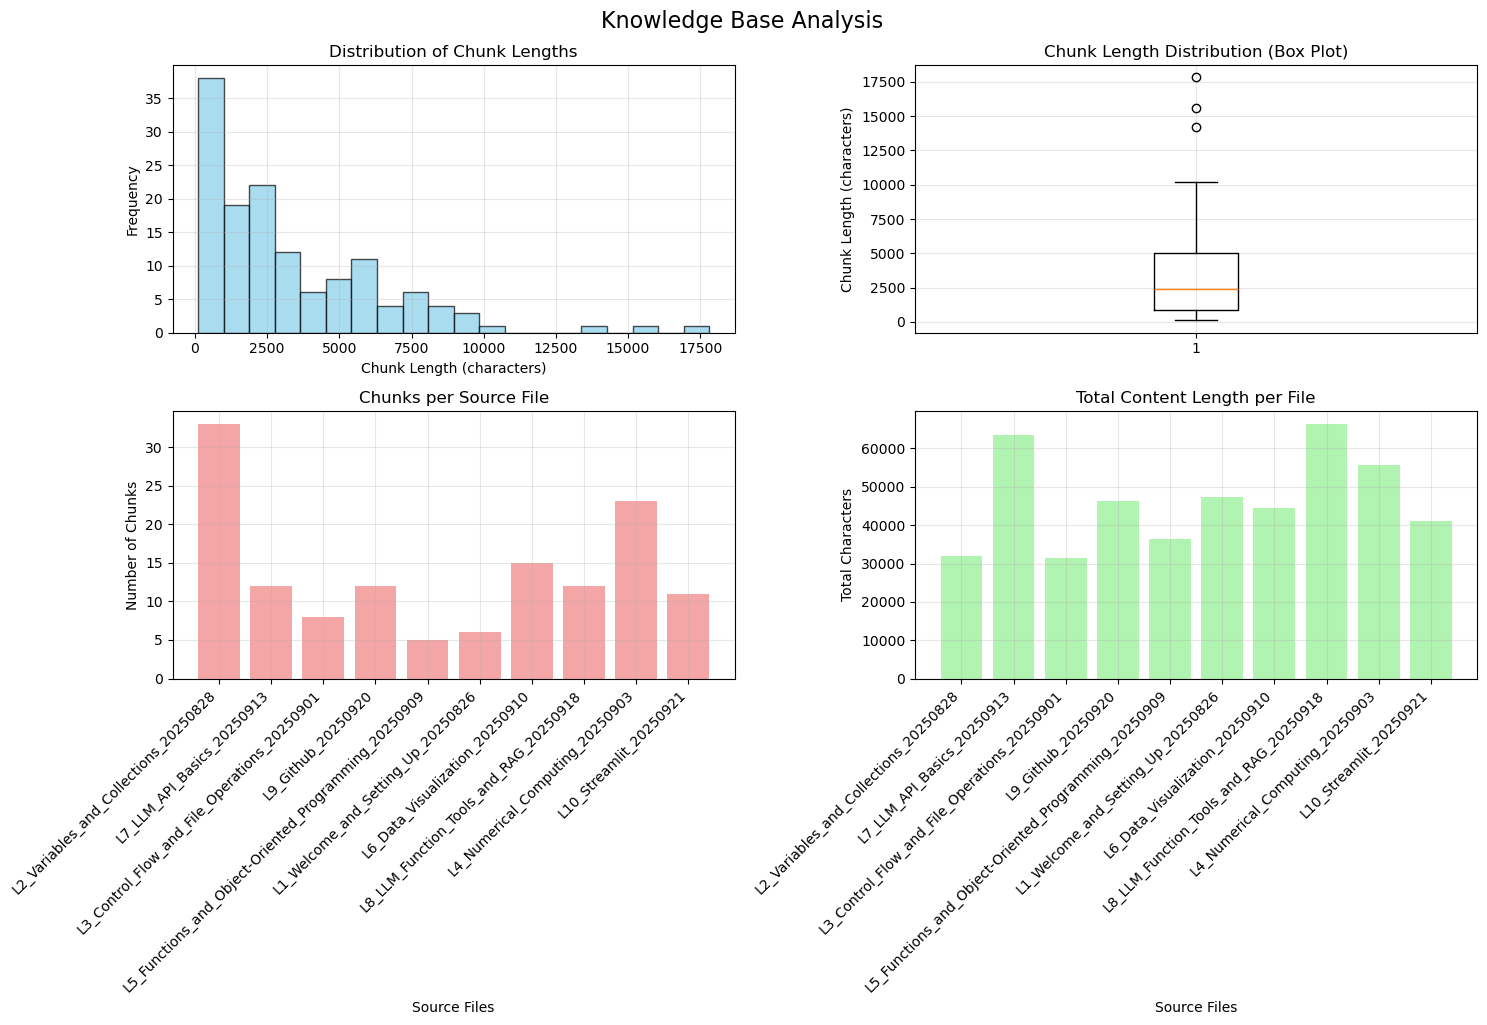

=== Detailed Chunk Analysis ===
Total chunks: 137
Mean chunk length: 3393.8 characters
Median chunk length: 2420.0 characters
Standard deviation: 3181.8 characters
Min chunk length: 108 characters
Max chunk length: 17810 characters


In [8]:
# Analyze chunk distribution
chunks = tutor.document_processor.get_chunks()
chunk_lengths = [len(chunk['text']) for chunk in chunks]  # Calculate length from text
source_files = [chunk['source_file'] for chunk in chunks]

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram of chunk lengths
ax1.hist(chunk_lengths, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Chunk Length (characters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Chunk Lengths')
ax1.grid(True, alpha=0.3)

# 2. Box plot of chunk lengths
ax2.boxplot(chunk_lengths)
ax2.set_ylabel('Chunk Length (characters)')
ax2.set_title('Chunk Length Distribution (Box Plot)')
ax2.grid(True, alpha=0.3)

# 3. Chunks per source file
file_counts = Counter(source_files)
files = list(file_counts.keys())
counts = list(file_counts.values())

ax3.bar(range(len(files)), counts, color='lightcoral', alpha=0.7)
ax3.set_xlabel('Source Files')
ax3.set_ylabel('Number of Chunks')
ax3.set_title('Chunks per Source File')
ax3.set_xticks(range(len(files)))
ax3.set_xticklabels([f.replace('Lecture', 'L') for f in files], rotation=45, ha='right')
ax3.grid(True, alpha=0.3)

# 4. Cumulative chunk length by file
file_total_lengths = {}
for chunk in chunks:
    file = chunk['source_file']
    if file not in file_total_lengths:
        file_total_lengths[file] = 0
    file_total_lengths[file] += len(chunk['text'])  # Use text length

files = list(file_total_lengths.keys())
lengths = list(file_total_lengths.values())

ax4.bar(range(len(files)), lengths, color='lightgreen', alpha=0.7)
ax4.set_xlabel('Source Files')
ax4.set_ylabel('Total Characters')
ax4.set_title('Total Content Length per File')
ax4.set_xticks(range(len(files)))
ax4.set_xticklabels([f.replace('Lecture', 'L') for f in files], rotation=45, ha='right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Knowledge Base Analysis', fontsize=16, y=1.02)
plt.show()

# Print detailed statistics
print("=== Detailed Chunk Analysis ===")
print(f"Total chunks: {len(chunks)}")
print(f"Mean chunk length: {np.mean(chunk_lengths):.1f} characters")
print(f"Median chunk length: {np.median(chunk_lengths):.1f} characters")
print(f"Standard deviation: {np.std(chunk_lengths):.1f} characters")
print(f"Min chunk length: {min(chunk_lengths)} characters")
print(f"Max chunk length: {max(chunk_lengths)} characters")

## Testing the AI Tutor

Let's test our AI tutor with various types of questions to demonstrate its capabilities. These examples will show real AI responses using your Anthropic API key.

In [9]:
# Live Interactive Demo with Real AI Responses
def demo_chat():
    """Demo of actual AI tutor interactions."""
    
    sample_questions = [
        "What programming concepts will I learn?",
        "How do I handle data in astronomy?", 
        "What visualization tools are covered?"
    ]
    
    print("=== Live AI Tutor Demo ===")
    print("Real conversations with the AI tutor:")
    print()
    
    # Add debug info to track loop execution
    for i, q in enumerate(sample_questions, 1):
        print(f"💬 Student Question {i}: {q}")
        
        # Show what gets found
        results = tutor.vector_store.search(q, top_k=1)
        if results:
            print(f"📚 Found relevant content from: {results[0]['source_file']} (similarity: {results[0]['similarity_score']:.3f})")
        
        # Get real AI response  
        print(f"\n🤖 AI Tutor Response:")
        response = tutor.ask(q)
        print(response)
        print(f"\n{'=' * 60}")
        print()
        
        # Debug: Confirm question processing completed
        print(f"[DEBUG] Completed processing question {i}")
        print()
    
    print("✅ Demo complete! The AI tutor is ready for your questions.")
    print("Usage: response = tutor.ask('Your question here')")

# Check if demo has already been run in this session to prevent duplication
if 'demo_executed' not in globals():
    from IPython.display import clear_output
    print("🔄 Starting AI Tutor Demo...")
    demo_chat()
    demo_executed = True
    print(f"\n[DEBUG] Demo execution completed. demo_executed = {demo_executed}")
else:
    print("✅ Demo already executed this session.")
    print("💡 To run demo again, call: demo_chat()")
    print("💡 Or restart kernel for fresh demo.")
print()

🔄 Starting AI Tutor Demo...
=== Live AI Tutor Demo ===
Real conversations with the AI tutor:

💬 Student Question 1: What programming concepts will I learn?
📚 Found relevant content from: Lecture8_LLM_Function_Tools_and_RAG_20250918 (similarity: 0.480)

🤖 AI Tutor Response:
Based on the course materials provided, this course focuses on **practical AI and Large Language Model (LLM) programming concepts** specifically tailored for astronomy research. Here's what you'll learn:

## Core Programming Concepts

1. **Building AI-Powered Research Assistants**
   - Creating computational tools that go beyond simple chatbots
   - Developing assistants that can perform astronomical calculations
   - Integrating AI with domain-specific knowledge bases

2. **Working with Large Language Models**
   - Understanding and using models like GPT, Claude, and Gemini
   - Applying LLMs as research tools in astronomy
   - Moving from theoretical AI concepts to practical implementation

3. **Computational Resea

## Error Handling and Edge Cases

Let's demonstrate the robust error handling built into our system and test various edge cases.

In [10]:
# Test basic error handling

print("=== Error Handling Tests ===")

# Test 1: Query with no relevant results
print("Test 1: Irrelevant query")
results = tutor.vector_store.search("quantum physics of unicorns", top_k=3)
print(f"Results for irrelevant query: {len(results)}")

# Test 2: Empty query
print("\nTest 2: Empty query")
results = tutor.vector_store.search("", top_k=3)
print(f"Results for empty query: {len(results)}")

# Test 3: System status
print("\nTest 3: System status")
print(f"Has embeddings: {tutor.vector_store.embeddings is not None}")
print(f"Total chunks: {len(tutor.document_processor.get_chunks())}")
print(f"API client available: {tutor.client is not None}")

# Test 4: Ask method with no relevant results
print("\nTest 4: Ask method with irrelevant query")
response = tutor.ask("quantum physics of unicorns")
print(f"Response: {response}")

print("\n=== Error Handling Complete ===")

=== Error Handling Tests ===
Test 1: Irrelevant query
Results for irrelevant query: 3

Test 2: Empty query
Results for empty query: 3

Test 3: System status
Has embeddings: True
Total chunks: 137
API client available: True

Test 4: Ask method with irrelevant query
Response: I appreciate your question, but I need to redirect you to course-related topics.

The question about "quantum physics of unicorns" isn't covered in our astronomy programming course materials. Our course focuses on practical Python programming skills for astronomy applications, such as:

- Working with astronomical data (star catalogs, magnitudes, coordinates)
- Using Python data structures (dictionaries, lists)
- Control flow for decision-making in astronomy contexts
- Safe data handling and formatted output

**If you have questions about:**
- Programming concepts from the course materials (like dictionaries, f-strings, or if statements)
- Applying Python to real astronomy problems
- How to work with stellar data or

## Usage Instructions and Examples

Here's how to use the AI tutor system in practice, with examples of common use cases for astronomy students.
# Simplified AI Tutor Usage

## Setup

1. **Install packages:** `pip install sentence-transformers anthropic matplotlib python-dotenv`
2. **Set API key:** `export ANTHROPIC_API_KEY='your-key-here'` 
3. **Put lecture .md files in 'Lecture' directory**

## Basic Usage

```python
# Initialize
tutor = AITutor('Lecture')
tutor.initialize()

# Ask questions
response = tutor.ask('How do I use NumPy?')
print(response)
```

## Features

- **Automatic Processing**: Processes all lecture markdown files automatically
- **Section-based Chunking**: Splits content by section headers (##)
- **Semantic Search**: Uses sentence transformers for intelligent content retrieval
- **AI-Powered**: Powered by Anthropic's Claude AI for natural responses
- **Clean Architecture**: Simple 3-class object-oriented design

## Example Questions

- "What is this course about?"
- "How do I create Python functions?" 
- "What is object-oriented programming?"
- "How do I make plots with matplotlib?"
- "What are NumPy arrays used for?"

**Ready to help with astronomy programming!** 🚀

## Project Summary and Reflection

### What We Built
This simplified RAG-based AI tutor demonstrates the core concepts of retrieval-augmented generation in a clean, understandable way. The system consists of three main components:

1. **DocumentProcessor**: Loads markdown lecture files and splits them into semantic chunks
2. **VectorStore**: Creates embeddings using sentence transformers and performs similarity search  
3. **AITutor**: Orchestrates the RAG pipeline using Anthropic's Claude for intelligent responses

### Key Programming Concepts Demonstrated
- **Object-Oriented Programming**: Three well-designed classes with clear responsibilities
- **File I/O**: Reading and processing multiple markdown files
- **Error Handling**: Try/except blocks throughout for robust operation
- **Data Structures**: Lists, dictionaries, and NumPy arrays for data management
- **External APIs**: Integration with Anthropic's Claude API
- **Modern AI Tools**: Sentence transformers for semantic similarity

### Real-World Applications
This system could be extended for:
- Course Q&A systems for any subject area
- Internal company knowledge bases
- Research paper summarization tools
- Technical documentation assistants

The core RAG pattern demonstrated here scales to much larger document collections.

## From Jupyter Notebook to Web Application: app.py

### 🌐 **Research to Production**

After developing our RAG system in this notebook, we created `app.py` - a **Streamlit web application** that transforms our experimental code into a user-friendly interface.

### 🔄 **Key Changes Made**

#### **User Interface Upgrade**
- **Jupyter**: `print()` statements for output
- **Streamlit**: Rich UI with `st.info()`, `st.success()`, visual feedback and icons

#### **Easy Configuration** 
- **Jupyter**: Requires `.env` file setup
- **Streamlit**: Direct API key input through secure password widget

#### **Chat Interface**
- **Jupyter**: One question at a time
- **Streamlit**: Full conversation history like ChatGPT

#### **Performance**
- **Caching** with `@st.cache_resource` prevents reloading embeddings
- **Multi-user support** for concurrent sessions

### 🎨 **User Experience Features**

- **Sidebar** with configuration and sample questions
- **Loading indicators** and real-time status updates  
- **Professional chat interface** with message bubbles
- **Error handling** with helpful user messages

### 📱 **Live Demo**

**🌐 Try it:** [https://astron-1221-ai-tutor.streamlit.app/](https://astron-1221-ai-tutor.streamlit.app/)

## Limitations of AI Assistant and LLM API

### 🚨 **Critical Awareness: AI is Not Infallible**

While our RAG-based AI tutor demonstrates impressive capabilities, it's crucial to understand its significant limitations. These constraints highlight why human oversight and critical thinking remain essential in AI-assisted learning.

### 🤔 **Problem 1: Lack of Self-Awareness and Error Recognition**

**The Issue:**
AI assistants, including our tutor, have a fundamental flaw: **they cannot reliably recognize when they make mistakes**. The AI will confidently provide incorrect answers with the same tone and certainty as correct ones.

**Real-World Example:**
- **AI Response**: "The speed of light is approximately 300,000 km/s" ✅ (Correct)
- **AI Response**: "Jupiter has 12 moons" ❌ (Wrong - Jupiter has 95+ known moons)

Both responses are delivered with identical confidence. The AI doesn't say "I'm not sure" or "This might be wrong."

**Why This Happens:**
- AI models are trained to sound confident and helpful
- They lack true understanding - they pattern-match from training data
- No built-in mechanism for self-doubt or uncertainty quantification
- Cannot distinguish between confident knowledge and educated guesses

### 📏 **Problem 2: Token Limits and Response Truncation**

**The Issue:**
Our system sets `max_tokens=300` for Claude responses, but **LLMs will attempt to generate much longer responses** and get cut off mid-sentence.

**What You'll See:**
```
AI Response: "The key concepts in astronomy data analysis include statistical methods for measuring stellar brightness, error propagation techniques for handling measurement uncertainty, and various plotting approaches such as histograms for distribution analysis and scatter plots for correlation studies. When working with large datasets, you'll need to consider computational efficiency and..."
[Response truncated due to token limit]
```

**Technical Details:**
- **Claude's natural response**: Often 500-800 tokens for complex questions
- **Our artificial limit**: 300 tokens to keep responses concise
- **Result**: Incomplete explanations, cut-off mid-thought
- **No awareness**: The AI doesn't know it's being truncated

### 🎯 **Problem 3: Overconfidence in Retrieved Context**

**The Issue:**
Our RAG system finds the "most relevant" content using similarity scores, but **most relevant ≠ actually relevant**. The AI will confidently answer based on tangentially related content.

**Example Scenario:**
- **Student Question**: "How do I calculate orbital periods?"
- **Retrieved Content**: Section about "time series analysis" (similarity: 0.4)
- **AI Response**: Confident answer about time series instead of orbital mechanics

### ⚖️ **Implications for Learning**

**❌ What NOT to do:**
- Blindly trust AI responses without verification
- Skip checking answers against authoritative sources
- Use AI as a replacement for understanding concepts yourself

**✅ What TO do:**
- Treat AI responses as starting points for investigation
- Cross-reference important information with textbooks/lectures
- Develop critical thinking skills to evaluate AI-generated content
- Use AI as a study partner, not a definitive authority

### 🔬 **Why Understanding Limitations Matters**

As future scientists and programmers, recognizing AI limitations is crucial:

1. **Scientific Integrity**: Knowing when tools might fail prevents propagation of errors
2. **Critical Thinking**: Builds healthy skepticism essential for research
3. **Tool Mastery**: Understanding limitations helps you use AI more effectively
4. **Professional Development**: Shows sophisticated understanding of technology

### 💡 **The Bottom Line**

AI tutors are powerful **assistants**, not **replacements** for learning. They excel at:
- Finding relevant information quickly
- Explaining concepts in accessible language
- Providing 24/7 availability for questions

But they fail at:
- Recognizing their own mistakes
- Admitting uncertainty or gaps in knowledge
- Providing complete responses within arbitrary limits
- Distinguishing between high and low confidence answers

**Remember: The goal is to enhance your learning, not to think for you.**

## 📂 Project Repository and Resources

### 🌐 **GitHub Repository**

**📍 Complete Project Available At:**
**[https://github.com/JacobParzych/Astron_1221_AI_Tutor](https://github.com/JacobParzych/Astron_1221_AI_Tutor)**

### 📋 **Repository Contents**

The GitHub repository contains the complete project structure and additional resources:

#### **🗂️ Core Files**
- **`Project1_Parzych_Jamison.ipynb`** - This comprehensive Jupyter notebook with all development work
- **`app.py`** - Production Streamlit web application code
- **`requirements.txt`** - All Python package dependencies
- **`README.md`** - Detailed project documentation and setup instructions

#### **📚 Supporting Materials**
- **`Lecture/`** directory - All course markdown files used by the RAG system
- **`.env.example`** - Template for API key configuration
- **Version control history** - Complete development timeline and commit messages

### 🚀 **Quick Access**

#### **📖 Documentation**
The **README.md** file in the repository provides:
- **Setup instructions** for local development
- **API key configuration** guidance
- **Streamlit deployment** steps
- **Usage examples** and troubleshooting

#### **💻 Production Code**
The **`app.py`** file contains the complete Streamlit application:
- **Web interface** with chat functionality
- **Production optimizations** (caching, error handling)
- **User-friendly configuration** (no .env file required)
- **Multi-user support** for concurrent sessions

### 🎯 **Next Steps**

1. **📥 Clone the repository** to your local machine
2. **📄 Read the README.md** for detailed setup instructions  
3. **🔧 Configure your API key** following the documentation
4. **🚀 Run the Streamlit app** locally or deploy to the cloud
5. **🛠️ Modify and experiment** with your own lecture materials

### 🌟 **Live Demo**
**[https://astron-1221-ai-tutor.streamlit.app/](https://astron-1221-ai-tutor.streamlit.app/)**

---

**🎓 Project by Jacob Parzych & Niko Jamison**  
*Astronomy 1221 - Programming for Astronomers*  
*The Ohio State University - Fall 2024*